In [2]:
import pandas as pd
import numpy as np

In [2]:
gmdf = pd.read_csv('gmdf_reduced.csv')
gmdf.head()

,Unnamed: 0,출발주소,도착주소,총통행량
0,0,강원도,거창군,7.00
1,1,강원도,고성군,1.00
2,2,강원도,김해시,107.50
3,3,강원도,밀양시,31.75
4,4,강원도,사천시,13.50


In [3]:
gmdf = gmdf.drop('Unnamed: 0',axis=1)
gmdf.head()

,출발주소,도착주소,총통행량
0,강원도,거창군,7.00
1,강원도,고성군,1.00
2,강원도,김해시,107.50
3,강원도,밀양시,31.75
4,강원도,사천시,13.50


In [9]:
# drop non-neighbors
dropIdx = gmdf[(gmdf['출발주소']=='강원도')|(gmdf['출발주소']=='경기도')|
                (gmdf['출발주소']=='광주광역시')|(gmdf['출발주소']=='대전광역시')|
                (gmdf['출발주소']=='세종특별자치시')|
                (gmdf['출발주소']=='충청남도')|(gmdf['출발주소']=='충청북도')|
                (gmdf['도착주소']=='강원도')|(gmdf['도착주소']=='경기도')|
                (gmdf['도착주소']=='광주광역시')|(gmdf['도착주소']=='대전광역시')|
                (gmdf['도착주소']=='세종특별자치시')|
                (gmdf['도착주소']=='충청남도')|(gmdf['도착주소']=='충청북도')].index
gmdf = gmdf.drop(dropIdx)
gmdf.head()

,출발주소,도착주소,총통행량
15,거제시,창원시,8948.0
16,거제시,통영시,38332.0
19,거창군,경상북도,811193.0
20,거창군,고성군,22.5
22,거창군,김해시,173.0


In [10]:
# drop self-loops
nList = np.concatenate((gmdf['출발주소'].values, gmdf['도착주소'].values), axis=None)
nList = np.unique(nList)

# create an empty matrix to fill up
adjMatrix = pd.DataFrame(np.zeros((len(nList),len(nList))), columns=nList, index=nList)
adjMatrix.head()

# while iterating over the rows, fill up the elements
for index, row in gmdf.iterrows():
    adjMatrix[row['출발주소']][row['도착주소']] += row['총통행량']
adjMatrix.head()

C:\Users\syj43\AppData\Local\Temp\ipykernel_10012\3153265280.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[row['출발주소']][row['도착주소']] += row['총통행량']


,거제시,거창군,경상북도,고령군,고성군,김해시,남해군,대구광역시,밀양시,부산광역시,...,전라남도,전라북도,진주시,창녕군,창원시,통영시,하동군,함안군,함양군,합천군
거제시,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
거창군,0.0,0.0,947.50,0.0,22.75,179.50,0.0,2063.0,0.0,132.0,...,114.75,182.75,230.75,130.75,72.75,43.50,14.25,243.50,135846.75,5823.00
경상북도,0.0,811193.0,0.00,11817.0,6.50,5161.75,0.0,0.0,1685243.0,0.0,...,0.00,0.00,195.25,724032.25,682.00,26.75,168.75,1730.75,152.00,187710.75
고령군,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,3828.00,0.00,0.00,0.00,0.00,0.00,1592.00
고성군,0.0,22.5,5.25,0.0,0.00,9.00,0.0,10.0,0.0,11.5,...,176.00,92.00,21907.25,1.50,7.25,95398.25,118.75,52.50,28.75,0.25


In [11]:
adjMatrix.to_csv('provTrafficAjdMatrix.csv')

In [12]:
# add the lower triangle to the upper one
for i in range(len(nList)): #row
    for j in range(i+1,len(nList)): #col
        adjMatrix.iloc[i][j] += adjMatrix.iloc[j][i]

# clear dialonal elements and those in the lower triangle
for i in range(len(nList)):
    for j in range(i):
        adjMatrix.iloc[i][j] = 0
adjMatrix.head()

# store values in the upper triangle for edge color
edgeColorList = []
for i in range(len(nList)):
    for j in range(i+1,len(nList)):
        if adjMatrix.iloc[i][j]<0.1:
            continue
        else:
            edgeColorList.append(int(adjMatrix.iloc[i][j]))

for i in range(len(nList)):
    for j in range(len(nList)):
        if adjMatrix.iloc[i][j] == 0:
            adjMatrix.iloc[i][j] = np.nan

pair = adjMatrix.stack().index.values

former = []
latter = []
for i in range(len(pair)):
    former.append(pair[i][0])
    latter.append(pair[i][1])

valueZip = zip(former,latter,edgeColorList)
valueZip = list(valueZip)
valueZip[:5]

C:\Users\syj43\AppData\Local\Temp\ipykernel_10012\821271487.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adjMatrix.iloc[i][j] += adjMatrix.iloc[j][i]
C:\Users\syj43\AppData\Local\Temp\ipykernel_10012\821271487.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assig

[('거제시', '사천시', 21790),
 ('거제시', '창원시', 8948),
 ('거제시', '통영시', 38332),
 ('거창군', '경상북도', 812140),
 ('거창군', '고성군', 45)]

In [95]:
df = pd.DataFrame.from_records(valueZip, columns =['municipality1', 'municipality2', 'traffic'] )
df.head()

,municipality1,municipality2,traffic
0,거제시,사천시,21790
1,거제시,창원시,8948
2,거제시,통영시,38332
3,거창군,경상북도,812140
4,거창군,고성군,45


In [2]:
df.to_csv('provinceTraffic_reduced.csv', encoding='utf-8')

NameError: name 'df' is not defined

In [31]:
df = pd.read_excel('provinceTraffic_reduced&trimed.xlsx',sheet_name='sorted')
df.head()

,municipality1,municipality2,traffic
0,김해시,창원시,4749031
1,김해시,양산시,1215527
2,창원시,함안군,987777
3,사천시,진주시,820625
4,산청군,진주시,485658


In [32]:
# from a corresponding adjMatrix, obtain degree centrality
# drop self-loops
nList = np.concatenate((df['municipality1'].values, df['municipality2'].values), axis=None)
nList = np.unique(nList)

# create an empty matrix to fill up
adjMatrix = pd.DataFrame(np.zeros((len(nList),len(nList))), columns=nList, index=nList)
adjMatrix.head()

# while iterating over the rows, fill up the elements
for index, row in df.iterrows():
    adjMatrix[row['municipality1']][row['municipality2']] += row['traffic']
    adjMatrix[row['municipality2']][row['municipality1']] += row['traffic']
adjMatrix.head()

C:\Users\syj43\AppData\Local\Temp\ipykernel_9800\674444509.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[row['municipality1']][row['municipality2']] += row['traffic']
C:\Users\syj43\AppData\Local\Temp\ipykernel_9800\67444450

,거제시,거창군,경상북도,고성군,김해시,남해군,대구광역시,밀양시,부산광역시,사천시,...,전라남도,전라북도,진주시,창녕군,창원시,통영시,하동군,함안군,함양군,합천군
거제시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21790.0,...,0.0,0.0,0.0,0.0,8948.0,38332.0,0.0,0.0,0.0,0.0
거창군,0.0,0.0,812140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,217957.0,0.0,0.0,0.0,0.0,0.0,0.0,136122.0,10757.0
경상북도,0.0,812140.0,0.0,0.0,0.0,0.0,0.0,2701396.0,0.0,0.0,...,0.0,0.0,0.0,724874.0,0.0,0.0,0.0,0.0,0.0,188473.0
고성군,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223112.0,...,0.0,0.0,104838.0,0.0,205146.0,102889.0,0.0,0.0,0.0,0.0
김해시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256147.0,5803915.0,0.0,...,0.0,0.0,0.0,0.0,4749031.0,0.0,0.0,0.0,0.0,0.0


In [33]:
edgeZip = zip(df['municipality1'],df['municipality2'])
edgeList = list(edgeZip)

In [54]:
# total traffic
totalTraff = adjMatrix.sum(axis='columns')
totalTraff

거제시         69070.0
거창군       1182805.0
경상북도      4426883.0
고성군        635985.0
김해시      12024620.0
남해군         12968.0
대구광역시     1074771.0
밀양시       3902648.0
부산광역시     5862225.0
사천시       1115012.0
산청군        702095.0
양산시       1420670.0
울산광역시       21099.0
의령군         40288.0
전라남도       423156.0
전라북도       580604.0
진주시       1506458.0
창녕군       2849811.0
창원시       6528152.0
통영시        157130.0
하동군        542772.0
함안군       1518987.0
함양군        667515.0
합천군        239856.0
dtype: float64

In [55]:
totalTraff = totalTraff.apply(lambda x:int(x/2))
totalTraff = totalTraff.drop(labels=['경상북도','대구광역시','부산광역시','울산광역시','전라남도','전라북도'])
totalTraff

거제시      34535
거창군     591402
고성군     317992
김해시    6012310
남해군       6484
밀양시    1951324
사천시     557506
산청군     351047
양산시     710335
의령군      20144
진주시     753229
창녕군    1424905
창원시    3264076
통영시      78565
하동군     271386
함안군     759493
함양군     333757
합천군     119928
dtype: int64

In [36]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('BinggraeII.ttf')

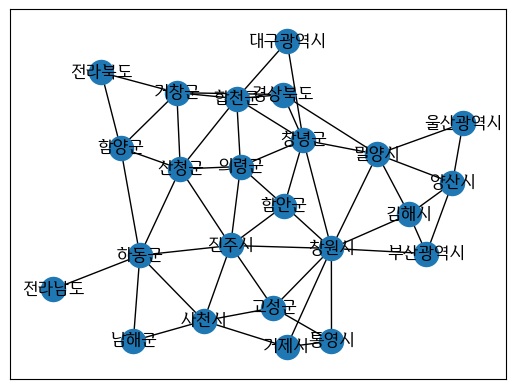

In [37]:
# its first look
F = nx.from_pandas_edgelist(df, source='municipality1', target='municipality2', edge_attr='traffic')
nx.draw_networkx(F, font_family='Binggrae?')

In [14]:
list(F.degree())

[('김해시', 4),
 ('창원시', 9),
 ('양산시', 4),
 ('함안군', 4),
 ('사천시', 5),
 ('진주시', 7),
 ('산청군', 6),
 ('창녕군', 7),
 ('밀양시', 6),
 ('고성군', 4),
 ('함양군', 4),
 ('거창군', 5),
 ('통영시', 3),
 ('하동군', 6),
 ('거제시', 3),
 ('합천군', 6),
 ('의령군', 5),
 ('남해군', 2),
 ('경상북도', 4),
 ('대구광역시', 2),
 ('울산광역시', 2),
 ('전라남도', 1),
 ('부산광역시', 3),
 ('전라북도', 2)]

In [53]:
degree = pd.DataFrame(list(F.degree()),columns=['name','degree'])
# degree.set_index('name',inplace=True)
degree

,name,degree
0,김해시,4
1,창원시,9
2,양산시,4
3,함안군,4
4,사천시,5
5,진주시,7
6,산청군,6
7,창녕군,7
8,밀양시,6
9,고성군,4


In [40]:
# drop other provinces
degree = degree.iloc[:18,:]
degree

,degree
name,
김해시,4
창원시,9
양산시,4
함안군,4
사천시,5
진주시,7
산청군,6
창녕군,7
밀양시,6


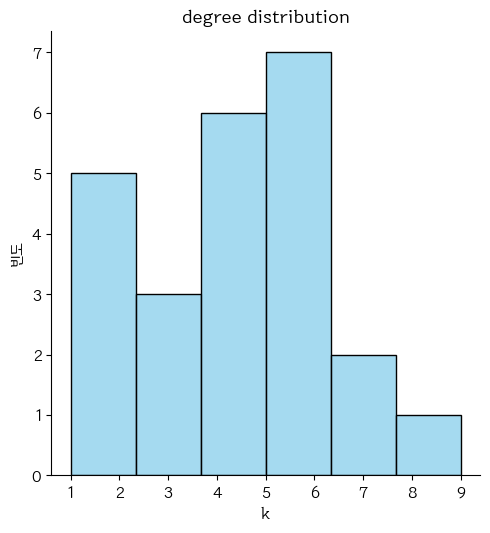

In [97]:
import seaborn as sns
mpl.rcParams["font.family"] = 'Binggrae?'
# sns.displot(degree['degree'].values, color='skyblue')

# plt.hist(degree['degree'].values, color='skyblue')
plt.xlabel('k')
plt.ylabel('빈도')
plt.title('degree distribution')
plt.show()

In [56]:
# normalize total traffic
temp = np.array(list(totalTraff.values))
tempNorm = np.round((temp - np.min(temp)) / (np.max(temp) - np.min(temp)),3)
totalTraff = totalTraff.to_frame()
totalTraff['weight'] = tempNorm*10
totalTraff = totalTraff.reset_index()
totalTraff

,index,0,weight
0,거제시,34535,0.05
1,거창군,591402,0.97
2,고성군,317992,0.52
3,김해시,6012310,10.00
4,남해군,6484,0.00
5,밀양시,1951324,3.24
6,사천시,557506,0.92
7,산청군,351047,0.57
8,양산시,710335,1.17
9,의령군,20144,0.02


In [91]:
# merge two dfs - degree, totalTraff
mdf = pd.merge(degree, totalTraff,left_on='name',right_on='index').drop('index',axis=1)
mdf = mdf.sort_values('name')
mdf

,name,degree,0,weight
14,거제시,3,34535,0.05
11,거창군,5,591402,0.97
9,고성군,4,317992,0.52
0,김해시,4,6012310,10.00
17,남해군,2,6484,0.00
8,밀양시,6,1951324,3.24
4,사천시,5,557506,0.92
6,산청군,6,351047,0.57
2,양산시,4,710335,1.17
16,의령군,5,20144,0.02


In [104]:
mdf.keys()

Index(['name', 'degree', 0, 'weight'], dtype='object')

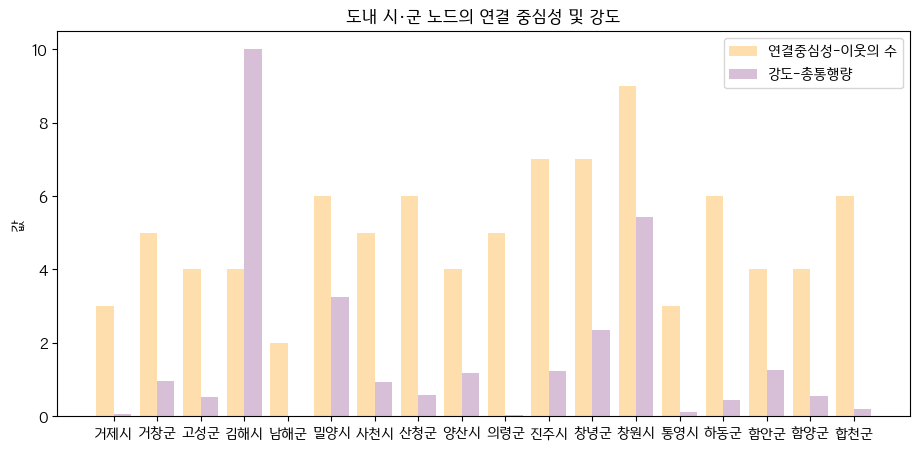

In [189]:
fig, axs = plt.subplots(1,1, figsize=(11,5))
X_axis = np.arange(len(mdf['name'].values)) 
plt.bar(X_axis-0.2,'degree',width=0.4, data=mdf,color='navajowhite', label='연결중심성-이웃의 수')
plt.bar(X_axis+0.2,'weight',width=0.4, data=mdf, color='thistle',label='강도-총통행량')
plt.xticks(X_axis, mdf['name'].values) 
plt.ylabel('값')
plt.title("도내 시·군 노드의 연결 중심성 및 강도") 
plt.legend() #loc='upper right', bbox_to_anchor=(0.28, 0.99) loc='upper center',bbox_to_anchor=(0.33, 0.99)
plt.show() 

In [190]:
fig.savefig('연결중심성수통행량.png',bbox_inches='tight')

In [141]:
list(range(2,10))

[2, 3, 4, 5, 6, 7, 8, 9]

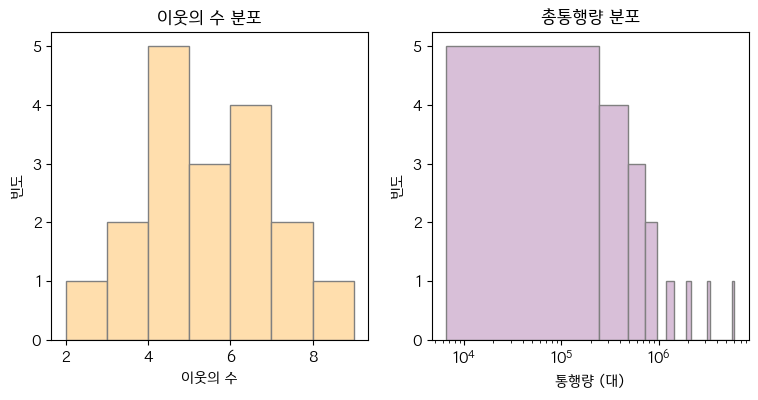

In [251]:
# distribution?
fig, axs = plt.subplots(1,2, figsize=(9,4))
# fig.tight_layout()
axs[0].hist(mdf['degree'].values, color='navajowhite',edgecolor='gray',bins=list(range(2,10)))
axs[0].set(xlabel='이웃의 수',ylabel='빈도',title='이웃의 수 분포')
axs[1].hist(mdf[0].values, color='thistle', edgecolor='gray', bins=25)
axs[1].set(xlabel='통행량 (대)',ylabel='빈도',title='총통행량 분포')
axs[1].set_xscale('log')
# axs[1].set_xticks([20, 200, 500])
plt.show()

In [178]:
fig.savefig('degreeCentrality.png', bbox_inches='tight')

In [184]:
print("min",np.min(mdf['degree'].values))
print("max",np.max(mdf['degree'].values))
print("mean",np.mean(mdf['degree'].values))
print("std",np.std(mdf['degree'].values))

min 2
max 9
mean 5.0
std 1.6666666666666667


In [188]:
print("min",np.min(mdf[0].values))
print("max",np.max(mdf[0].values))
print("mean",np.mean(mdf[0].values))
print("std",np.std(mdf[0].values))

min 6484
max 6012310
mean 975467.6666666666
std 1457801.5324521677


In [179]:
print("min",np.min(np.log(df['traffic'].values)))
print("max",np.max(np.log(df['traffic'].values)))
print("std",np.std(np.log(df['traffic'].values)))

min 7.55171221535131
max 15.574043247806612
std 2.077146115041862


In [69]:
others = ['경상북도','대구광역시','부산광역시', '전라남도', '전라북도','울산광역시']

In [70]:
# Subtract String Lists
# using filter() + lambda
gyeong = list(filter(lambda x: x not in set(others),list(F.nodes())))

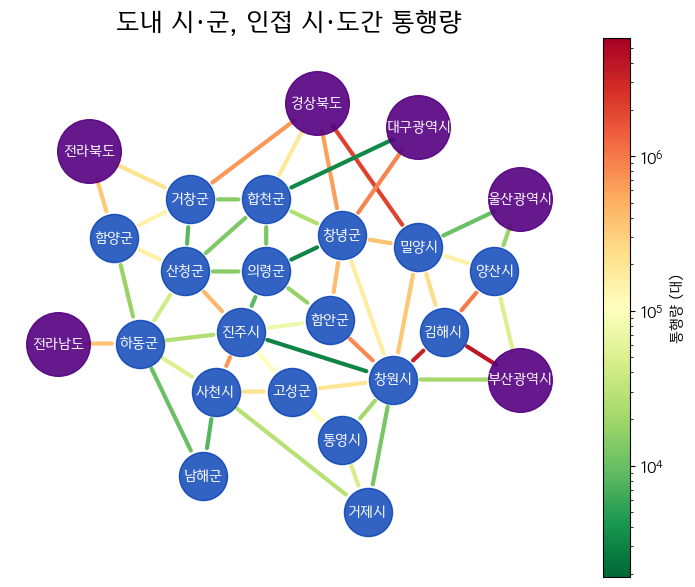

In [71]:
# visualize the network
fig, ax = plt.subplots(1,1, figsize=(9,7))
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.RdYlGn.reversed()
F = nx.from_pandas_edgelist(df, source='municipality1', target='municipality2', edge_attr='traffic')
# pos = nx.circular_layout(G)
pos = {'합천군':(300,600),'함양군':(0,520),'산청군':(140,450),'거창군':(150,600),'창녕군':(450,525),'하동군':(50,300)
      ,'고성군':(350,200),'통영시':(450,100),'사천시':(200,200),'진주시':(250,325),'밀양시':(600,500),'창원시':(550,225)
      ,'함안군':(425,350),'양산시':(750,450),'김해시':(650,325),'거제시':(500,-50),'의령군':(300,450),'남해군':(175,25)}
pos.update({'전라남도':(-110,300),'전라북도':(-50,700),'경상북도':(400,800),'대구광역시':(600,750),'울산광역시':(800,600),'부산광역시':(800,225)})
nodes = nx.draw_networkx_nodes(F, pos, nodelist=gyeong, node_size=1200, node_color='#003CB3', alpha=0.8)
nodes = nx.draw_networkx_nodes(F, pos, nodelist=others, node_size=2100, node_color='#550080', alpha=0.9)
nx.draw_networkx_labels(F, pos,labels={i:i for i in list(F.nodes())},font_family='Binggrae?',font_color='white', font_size=10, font_weight='bold')
edges = nx.draw_networkx_edges(
    F,
    pos,
    edgelist=edgeList,
    arrows=True,
    arrowstyle="-",
    connectionstyle='arc3', # rad=0.1
    arrowsize=20,
    width=3,
    edge_color=np.log(df['traffic'].values),
    edge_vmin=7,
    edge_vmax=16,
    edge_cmap=cmap,
    min_target_margin=20,
    min_source_margin=20
)

pc = mpl.collections.PatchCollection(edges, cmap=cmap, norm=mpl.colors.LogNorm(),lw=0)
pc.set_array(df['traffic'].values)

ax = plt.gca()
ax.set_axis_off()
# norm = mpl.colors.Normalize(vmin=5, vmax=80)
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
#              ax=ax, orientation='vertical', label='하루 평균 교통량 (천)', fraction=0.07, pad=0.05, location='left')
plt.colorbar(pc, ax=ax, label='통행량 (대)')
plt.title('도내 시·군, 인접 시·도간 통행량', fontsize=18)
plt.margins(0.05,0.1)
plt.show()

In [17]:
fig.savefig('도내시군인접시도간통행량.png')

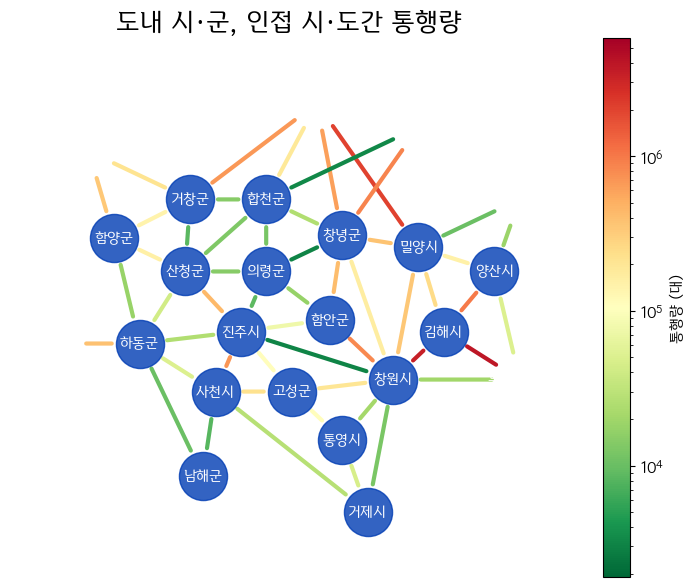

In [88]:
# visualize the network
fig, ax = plt.subplots(1,1, figsize=(9,7))
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.RdYlGn.reversed()
F = nx.from_pandas_edgelist(df, source='municipality1', target='municipality2', edge_attr='traffic')
# pos = nx.circular_layout(G)
pos = {'합천군':(300,600),'함양군':(0,520),'산청군':(140,450),'거창군':(150,600),'창녕군':(450,525),'하동군':(50,300)
      ,'고성군':(350,200),'통영시':(450,100),'사천시':(200,200),'진주시':(250,325),'밀양시':(600,500),'창원시':(550,225)
      ,'함안군':(425,350),'양산시':(750,450),'김해시':(650,325),'거제시':(500,-50),'의령군':(300,450),'남해군':(175,25)}
pos.update({'전라남도':(-110,300),'전라북도':(-50,700),'경상북도':(400,800),'대구광역시':(600,750),'울산광역시':(800,600),'부산광역시':(800,225)})
nodes = nx.draw_networkx_nodes(F, pos, nodelist=gyeong, node_size=1200, node_color='#003CB3', alpha=0.8)
# nodes = nx.draw_networkx_nodes(F, pos, nodelist=others, node_size=2100, node_color='#550080', alpha=0.9)
nx.draw_networkx_labels(F, pos,labels={i:i for i in list(F.nodes())},font_family='Binggrae?',font_color='white', font_size=10, font_weight='bold')
edges = nx.draw_networkx_edges(
    F,
    pos,
    edgelist=edgeList,
    arrows=True,
    arrowstyle="-",
    connectionstyle='arc3', # rad=0.1
    arrowsize=20,
    width=3,
    edge_color=np.log(df['traffic'].values),
    edge_vmin=7,
    edge_vmax=16,
    edge_cmap=cmap,
    min_target_margin=20,
    min_source_margin=20
)

pc = mpl.collections.PatchCollection(edges, cmap=cmap, norm=mpl.colors.LogNorm(),lw=0)
pc.set_array(df['traffic'].values)

ax = plt.gca()
ax.set_axis_off()
# norm = mpl.colors.Normalize(vmin=5, vmax=80)
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
#              ax=ax, orientation='vertical', label='하루 평균 교통량 (천)', fraction=0.07, pad=0.05, location='left')
plt.colorbar(pc, ax=ax, label='통행량 (대)')
plt.title('도내 시·군, 인접 시·도간 통행량', fontsize=18)
plt.margins(0.05,0.1)
plt.show()

In [78]:
# erase other provinces from df
df

,municipality1,municipality2,traffic
0,김해시,창원시,4749031
1,김해시,양산시,1215527
2,창원시,함안군,987777
3,사천시,진주시,820625
4,산청군,진주시,485658
5,창녕군,함안군,450542
6,밀양시,창녕군,412546
7,밀양시,창원시,377034
8,김해시,밀양시,256147
9,고성군,사천시,223112


In [79]:
idf = df.iloc[:38,:]
idf

,municipality1,municipality2,traffic
0,김해시,창원시,4749031
1,김해시,양산시,1215527
2,창원시,함안군,987777
3,사천시,진주시,820625
4,산청군,진주시,485658
5,창녕군,함안군,450542
6,밀양시,창녕군,412546
7,밀양시,창원시,377034
8,김해시,밀양시,256147
9,고성군,사천시,223112


In [81]:
edgeZipi = zip(idf['municipality1'],idf['municipality2'])
edgeListi = list(edgeZipi)

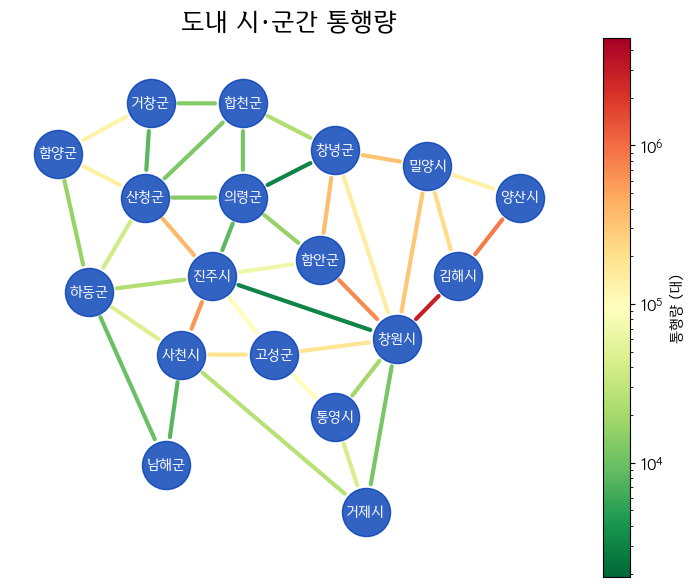

In [86]:
# visualize the network
fig, ax = plt.subplots(1,1, figsize=(9,7))
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.RdYlGn.reversed()
H = nx.from_pandas_edgelist(idf, source='municipality1', target='municipality2', edge_attr='traffic')
# pos = nx.circular_layout(G)
pos = {'합천군':(300,600),'함양군':(0,520),'산청군':(140,450),'거창군':(150,600),'창녕군':(450,525),'하동군':(50,300)
      ,'고성군':(350,200),'통영시':(450,100),'사천시':(200,200),'진주시':(250,325),'밀양시':(600,500),'창원시':(550,225)
      ,'함안군':(425,350),'양산시':(750,450),'김해시':(650,325),'거제시':(500,-50),'의령군':(300,450),'남해군':(175,25)}
# pos.update({'전라남도':(-110,300),'전라북도':(-50,700),'경상북도':(400,800),'대구광역시':(600,750),'울산광역시':(800,600),'부산광역시':(800,225)})
nodes = nx.draw_networkx_nodes(H, pos, node_size=1200, node_color='#003CB3', alpha=0.8)
# nodes = nx.draw_networkx_nodes(F, pos, nodelist=others, node_size=2100, node_color='#550080', alpha=0.9)
nx.draw_networkx_labels(H, pos,labels={i:i for i in list(H.nodes())},font_family='Binggrae?',font_color='white', font_size=10, font_weight='bold')
edges = nx.draw_networkx_edges(
    H,
    pos,
    edgelist=edgeListi,
    arrows=True,
    arrowstyle="-",
    connectionstyle='arc3', # rad=0.1
    arrowsize=20,
    width=3,
    edge_color=np.log(idf['traffic'].values),
    edge_vmin=7,
    edge_vmax=16,
    edge_cmap=cmap,
    min_target_margin=20,
    min_source_margin=20
)

pc = mpl.collections.PatchCollection(edges, cmap=cmap, norm=mpl.colors.LogNorm(),lw=0)
pc.set_array(idf['traffic'].values)

ax = plt.gca()
ax.set_axis_off()
# norm = mpl.colors.Normalize(vmin=5, vmax=80)
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
#              ax=ax, orientation='vertical', label='하루 평균 교통량 (천)', fraction=0.07, pad=0.05, location='left')
plt.colorbar(pc, ax=ax, label='통행량 (대)')
plt.title('도내 시·군간 통행량', fontsize=18)
plt.margins(0.05,0.1)
plt.show()

In [87]:
fig.savefig('경상남도네트워크.png')

In [13]:
df_sorted = df.sort_values(by='traffic', ascending=False, ignore_index=True)
df_sorted

,municipality1,municipality2,traffic
0,부산광역시,김해시,5803915
1,김해시,창원시,4749031
2,경상북도,밀양시,2701396
3,김해시,양산시,1215527
4,대구광역시,창녕군,1072719
5,창원시,함안군,987777
6,사천시,진주시,820625
7,경상북도,거창군,812140
8,경상북도,창녕군,724874
9,산청군,진주시,485658


In [16]:
df_sorted.to_csv('gNetworkTrafficSorted.csv')

In [20]:
# traffic more than M
miliondf = df_sorted.iloc[:5,:]
miliondf

,municipality1,municipality2,traffic
0,부산광역시,김해시,5803915
1,김해시,창원시,4749031
2,경상북도,밀양시,2701396
3,김해시,양산시,1215527
4,대구광역시,창녕군,1072719


In [39]:
# add a pair column
miliondf['pair'] = miliondf['municipality1'].astype(str) + '-' + miliondf['municipality2'].astype(str)
miliondf

C:\Users\syj43\AppData\Local\Temp\ipykernel_15264\1008898875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miliondf['pair'] = miliondf['municipality1'].astype(str) + '-' + miliondf['municipality2'].astype(str)


,municipality1,municipality2,traffic,pair,trafficScaled
0,부산광역시,김해시,5803915,부산광역시-김해시,580
1,김해시,창원시,4749031,김해시-창원시,474
2,경상북도,밀양시,2701396,경상북도-밀양시,270
3,김해시,양산시,1215527,김해시-양산시,121
4,대구광역시,창녕군,1072719,대구광역시-창녕군,107


In [40]:
miliondf['trafficScaled'] = miliondf['traffic'].apply(lambda x:int(x/10000))
miliondf

C:\Users\syj43\AppData\Local\Temp\ipykernel_15264\1570138619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miliondf['trafficScaled'] = miliondf['traffic'].apply(lambda x:int(x/10000))


,municipality1,municipality2,traffic,pair,trafficScaled
0,부산광역시,김해시,5803915,부산광역시-김해시,580
1,김해시,창원시,4749031,김해시-창원시,474
2,경상북도,밀양시,2701396,경상북도-밀양시,270
3,김해시,양산시,1215527,김해시-양산시,121
4,대구광역시,창녕군,1072719,대구광역시-창녕군,107


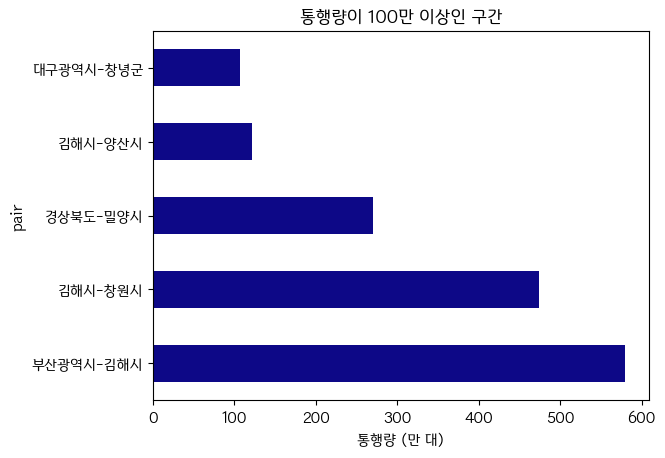

In [41]:
miliondf.plot(y='trafficScaled', x='pair',kind='barh', title='통행량이 100만 이상인 구간',colormap=plt.cm.plasma, xlabel='통행량 (만 대)', legend=False)
plt.show()

In [197]:
# centrality dataFrame
# betweenness
cdf = pd.DataFrame(nx.betweenness_centrality(F, weight='traffic').items(), columns=['name','betweenness'])
temp = np.array(cdf['betweenness'].values)
tempNorm = (temp - np.min(temp)) / (np.max(temp) - np.min(temp))
cdf['n.betweenness'] = tempNorm*10
cdf['betweenness'] = cdf['betweenness'].apply(lambda x: round(x,5))
cdf['n.betweenness'] = cdf['n.betweenness'].apply(lambda x: round(x,3))
# closeness
cdf['closeness'] = list(nx.closeness_centrality(F, distance='traffic').values())
temp = np.array(cdf['closeness'].values)
tempNorm = np.round((temp - np.min(temp)) / (np.max(temp) - np.min(temp)),3)
cdf['n.closeness'] = tempNorm*10
cdf.head()

,name,betweenness,n.betweenness,closeness,n.closeness
0,김해시,0.00000,0.000,0.000003,0.57
1,창원시,0.50593,8.312,0.000013,9.93
2,양산시,0.23715,3.896,0.000008,6.01
3,함안군,0.00000,0.000,0.000011,8.19
4,사천시,0.00395,0.065,0.000010,7.45


In [66]:
cdf.to_csv('pCentralityAdded.csv',encoding='utf-8')

In [199]:
ccdf = cdf.iloc[:18,:]
ccdf = ccdf.sort_values('name',ignore_index=True)
ccdf

,name,betweenness,n.betweenness,closeness,n.closeness
0,거제시,0.05929,0.974,0.000012,8.93
1,거창군,0.08696,1.429,0.000011,8.34
2,고성군,0.00000,0.000,0.000006,3.36
3,김해시,0.00000,0.000,0.000003,0.57
4,남해군,0.02372,0.390,0.000010,7.80
5,밀양시,0.08696,1.429,0.000007,5.01
6,사천시,0.00395,0.065,0.000010,7.45
7,산청군,0.14229,2.338,0.000012,8.87
8,양산시,0.23715,3.896,0.000008,6.01
9,의령군,0.46640,7.662,0.000012,9.77


In [213]:
ccdf['score'] = ccdf['n.betweenness'] + ccdf['n.closeness']

In [67]:
ccdf.to_csv('pCentralityGyeongAdded.csv',encoding='utf-8')

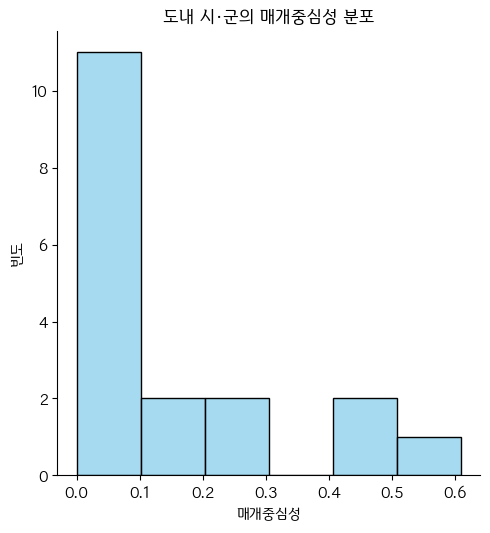

In [201]:
# visualize centrality measures
sns.displot(ccdf['betweenness'].values, color='skyblue')
plt.xlabel('매개중심성')
plt.ylabel('빈도')
plt.title('도내 시·군의 매개중심성 분포')
plt.show()

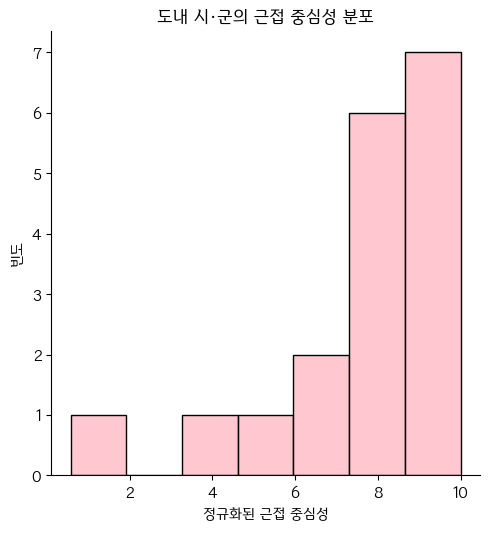

In [202]:
sns.displot(ccdf['n.closeness'].values, color='lightpink')
plt.xlabel('정규화된 근접 중심성')
plt.ylabel('빈도')
plt.title('도내 시·군의 근접 중심성 분포')
plt.show()

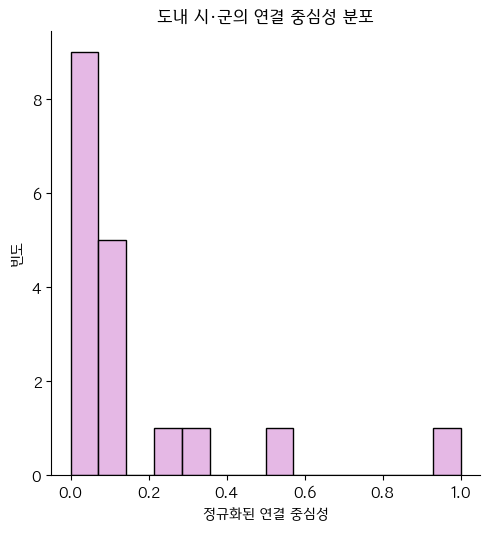

In [68]:
sns.displot(ccdf['n.degree'].values, color='plum')
plt.xlabel('정규화된 연결 중심성')
plt.ylabel('빈도')
plt.title('도내 시·군의 연결 중심성 분포')
plt.show()

In [134]:
# ranking of traffic towards other provinces
pdf = df.iloc[38:,:]
pdf

,municipality1,municipality2,traffic
38,경상북도,거창군,812140
39,경상북도,밀양시,2701396
40,경상북도,창녕군,724874
41,경상북도,합천군,188473
42,대구광역시,창녕군,1072719
43,대구광역시,합천군,2052
44,울산광역시,밀양시,7171
45,울산광역시,양산시,13928
46,전라남도,하동군,423156
47,부산광역시,양산시,42861


In [136]:
pdfSum = pdf.groupby('municipality1').sum()
pdfSum

,municipality2,traffic
municipality1,,
경상북도,거창군밀양시창녕군합천군,4426883
대구광역시,창녕군합천군,1074771
부산광역시,양산시창원시김해시,5862225
울산광역시,밀양시양산시,21099
전라남도,하동군,423156
전라북도,함양군거창군,580604


In [138]:
pdfSum = pdfSum.sort_values('traffic',ascending=False)
pdfSum

,municipality2,traffic
municipality1,,
부산광역시,양산시창원시김해시,5862225
경상북도,거창군밀양시창녕군합천군,4426883
대구광역시,창녕군합천군,1074771
전라북도,함양군거창군,580604
전라남도,하동군,423156
울산광역시,밀양시양산시,21099


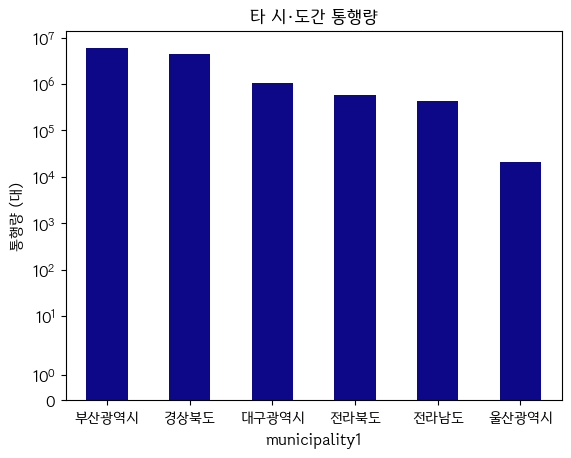

In [165]:
pdfSum['traffic'].plot(kind='bar', title='타 시·도간 통행량',colormap=plt.cm.plasma, logy='sym', xlabel=None, ylabel='통행량 (대)',rot=0)
plt.show()

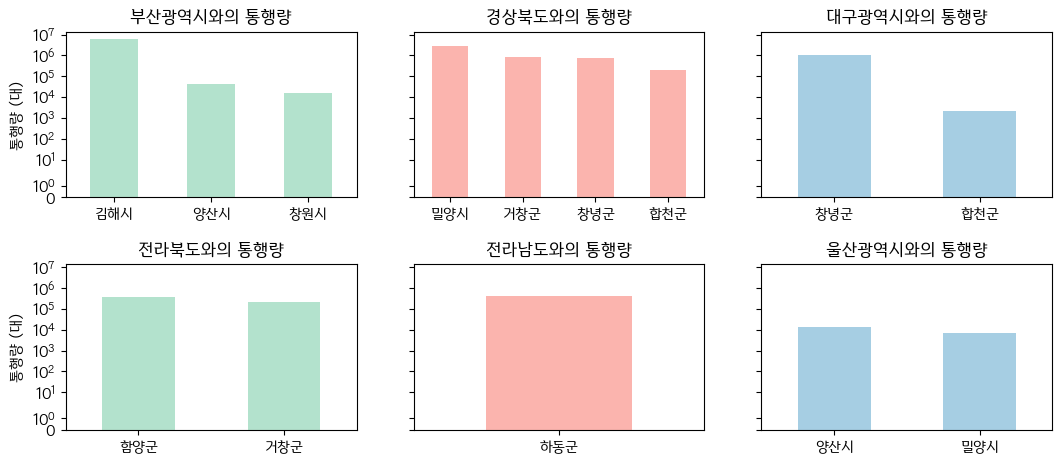

In [211]:
# comepare routes to each
route1 = pd.Series([5803915,42861,15449], index=['김해시','양산시','창원시'])
route2 = pd.Series([2701396,812140,724874,188473], index=['밀양시','거창군','창녕군','합천군'])
route3 = pd.Series([1072719,2052], index=['창녕군','합천군'])
route4 = pd.Series([362647,217957], index=['함양군','거창군'])
route5 = pd.Series([423156], index=['하동군'])
route6 = pd.Series([13928,7171], index=['양산시','밀양시'])

fig, axs = plt.subplots(2,3, sharey=True, figsize=(11,5))
fig.tight_layout(pad=2.5)
route1.plot(kind='bar', title='부산광역시와의 통행량', colormap=plt.cm.Pastel2, logy='sym', ylabel='통행량 (대)',rot=0, ax=axs[0,0])
route2.plot(kind='bar', title='경상북도와의 통행량', colormap=plt.cm.Pastel1, logy='sym', ylabel='통행량 (대)', rot=0, ax=axs[0,1])
route3.plot(kind='bar', title='대구광역시와의 통행량', colormap=plt.cm.Paired, logy='sym', ylabel='통행량 (대)', rot=0, ax=axs[0,2])

route4.plot(kind='bar', title='전라북도와의 통행량', colormap=plt.cm.Pastel2, logy='sym', ylabel='통행량 (대)',rot=0, ax=axs[1,0])
route5.plot(kind='bar', title='전라남도와의 통행량', colormap=plt.cm.Pastel1, logy='sym', ylabel='통행량 (대)', rot=0, ax=axs[1,1])
route6.plot(kind='bar', title='울산광역시와의 통행량', colormap=plt.cm.Paired, logy='sym', ylabel='통행량 (대)', rot=0, ax=axs[1,2])
plt.margins(0.1,0.2)
plt.show()

In [167]:
fig.savefig("타시도와의통행량경로별.png")

In [190]:
fig, axs = plt.subplots(2,3, figsize=(11,5))
fig.tight_layout(pad=2.5)
route1.plot(kind='pie', title='도로 유형별 통행량', autopct='%1.1f%%',shadow=True, ax=axs[0,0])
route2.plot(kind='pie', title='경상북도와의 통행량', autopct='%1.1f%%',colormap=plt.cm.Pastel1, ax=axs[0,1])
route3.plot(kind='pie', title='대구광역시와의 통행량', autopct='%1.1f%%',colormap=plt.cm.Paired, ax=axs[0,2])

route4.plot(kind='pie', title='전라북도와의 통행량', autopct='%1.1f%%',colormap=plt.cm.Pastel2, , ax=axs[1,0])
route5.plot(kind='pie', title='전라남도와의 통행량', autopct='%1.1f%%',colormap=plt.cm.Pastel1,  ax=axs[1,1])
route6.plot(kind='pie', title='울산광역시와의 통행량', autopct='%1.1f%%',colormap=plt.cm.Paired,ax=axs[1,2])
plt.margins(0.1,0.2)
plt.show()

SyntaxError: invalid syntax (816496414.py, line 7)

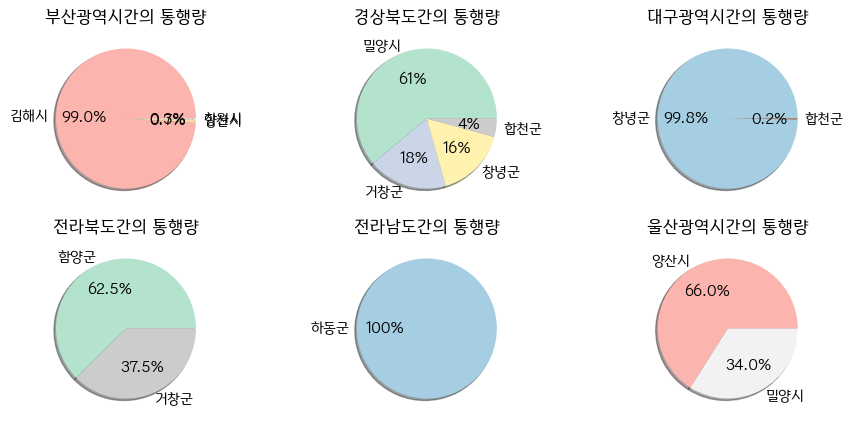

In [245]:
fig, axs = plt.subplots(2,3, figsize=(11,5))
route1.plot(kind='pie', title='부산광역시간의 통행량', autopct='%1.1f%%', colormap=plt.cm.Pastel1, shadow=True,ax=axs[0,0])
route2.plot(kind='pie', title='경상북도간의 통행량', autopct='%1.f%%', colormap=plt.cm.Pastel2, shadow=True,ax=axs[0,1])
route3.plot(kind='pie', title='대구광역시간의 통행량', autopct='%1.1f%%', colormap=plt.cm.Paired, shadow=True,ax=axs[0,2])
route4.plot(kind='pie', title='전라북도간의 통행량', autopct='%1.1f%%', colormap=plt.cm.Pastel2, shadow=True,ax=axs[1,0])
route5.plot(kind='pie', title='전라남도간의 통행량', autopct='%1.f%%', colormap=plt.cm.Paired, shadow=True,ax=axs[1,1])
route6.plot(kind='pie', title='울산광역시간의 통행량', autopct='%1.1f%%', colormap=plt.cm.Pastel1, shadow=True,ax=axs[1,2])
plt.margins(0.1,0.2)
plt.show()

In [246]:
fig.savefig("타시도와의통행량경로별파이.png")

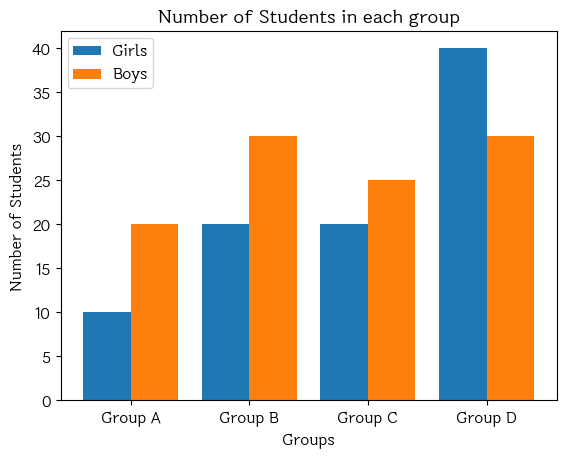

In [263]:
# multiple bar charts
X = ['Group A','Group B','Group C','Group D'] 
Ygirls = [10,20,20,40] 
Zboys = [20,30,25,30] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls') 
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Groups") 
plt.ylabel("Number of Students") 
plt.title("Number of Students in each group") 
plt.legend() 
plt.show() 

In [203]:
# visualize multiple bar charts
ccdf.head()
ccdf = ccdf.sort_values('name')

In [33]:
np.arange(len(ccdf['name'].values))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

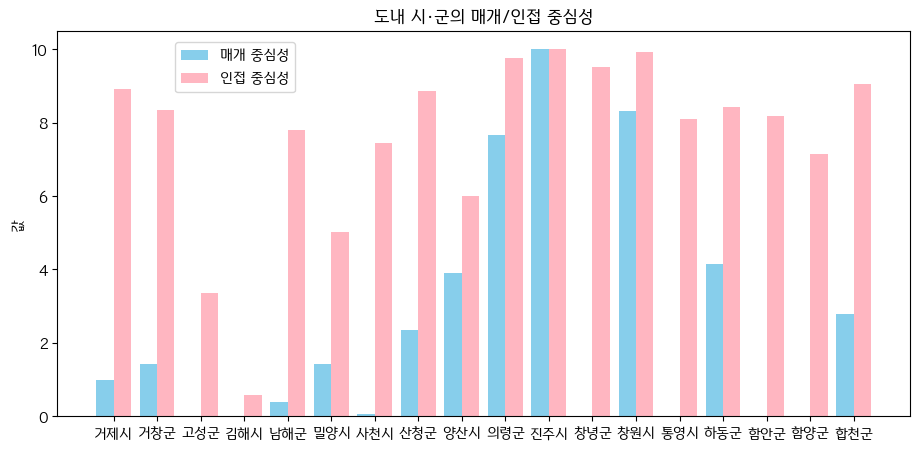

In [211]:
fig, axs = plt.subplots(1,1, figsize=(11,5))
X_axis = np.arange(len(ccdf['name'].values)) 
plt.bar(X_axis-0.2,'n.betweenness',width=0.4, data=ccdf,color='skyblue', label='매개 중심성')
plt.bar(X_axis+0.2,'n.closeness',width=0.4, data=ccdf, color='lightpink',label='인접 중심성')
# plt.bar(X_axis+0.3,'n.degree',width=0.3, data=ccdf, color='plum',label='연결 중심성')
plt.xticks(X_axis, ccdf['name'].values) 
plt.ylabel('값')
plt.title("도내 시·군의 매개/인접 중심성") 
plt.legend(loc='upper left',bbox_to_anchor=(0.13, 0.99)) #loc='upper right', bbox_to_anchor=(0.28, 0.99)
plt.show() 

In [212]:
fig.savefig('매개인접중심성.png')

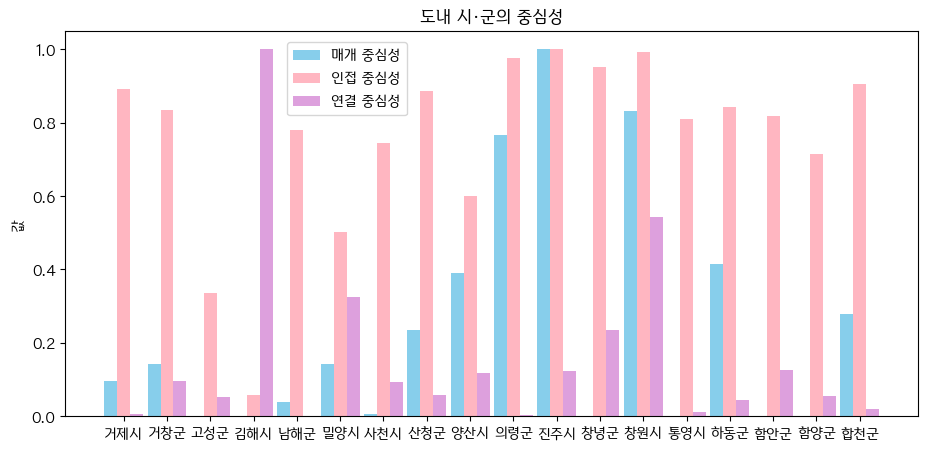

In [136]:
fig, axs = plt.subplots(1,1, figsize=(11,5))
X_axis = np.arange(len(ccdf['name'].values)) 
plt.bar(X_axis-0.3,'n.betweenness',width=0.3, data=ccdf,color='skyblue', label='매개 중심성')
plt.bar(X_axis,'n.closeness',width=0.3, data=ccdf, color='lightpink',label='인접 중심성')
plt.bar(X_axis+0.3,'n.degree',width=0.3, data=ccdf, color='plum',label='연결 중심성')
plt.xticks(X_axis, ccdf['name'].values) 
plt.ylabel('값')
plt.title("도내 시·군의 중심성") 
plt.legend(loc='upper center',bbox_to_anchor=(0.33, 0.99)) #loc='upper right', bbox_to_anchor=(0.28, 0.99)
plt.show() 

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(11,5))
X_axis = np.arange(len(ccdf['name'].values)) 
plt.bar(X_axis-0.2,'n.betweenness',width=0.3, data=ccdf,color='skyblue', label='매개 중심성')
plt.bar(X_axis+0.2,'n.closeness',width=0.3, data=ccdf, color='lightpink',label='인접 중심성')
plt.xticks(X_axis, ccdf['name'].values) 
plt.ylabel('값')
plt.title("도내 시·군의 중심성") 
plt.legend(loc='upper center',bbox_to_anchor=(0.33, 0.99)) #loc='upper right', bbox_to_anchor=(0.28, 0.99)
plt.show() 

In [83]:
fig.savefig('도내시군별중심성의값.png')

In [84]:
ccdf.head()

,name,betweenness,n.betweenness,closeness,n.closeness,degree,n.degree,score
0,거제시,0.05929,0.097,0.000012,0.893,17267,0.005,0.995
1,거창군,0.08696,0.143,0.000011,0.834,295701,0.097,1.074
2,고성군,0.00000,0.000,0.000006,0.336,158996,0.052,0.388
3,김해시,0.00000,0.000,0.000003,0.057,3006155,1.000,1.057
4,남해군,0.02372,0.039,0.000010,0.780,3242,0.000,0.819


In [216]:
# visualize sum of the measures in network
gdf = pd.read_excel('trafficInsideG_reduced.xlsx')
gdf.head()

,municipality1,municipality2,traffic
0,김해시,창원시,4749031
1,김해시,양산시,1215527
2,창원시,함안군,987777
3,사천시,진주시,820625
4,산청군,진주시,485658


In [217]:
T = nx.from_pandas_edgelist(gdf, source='municipality1', target='municipality2')

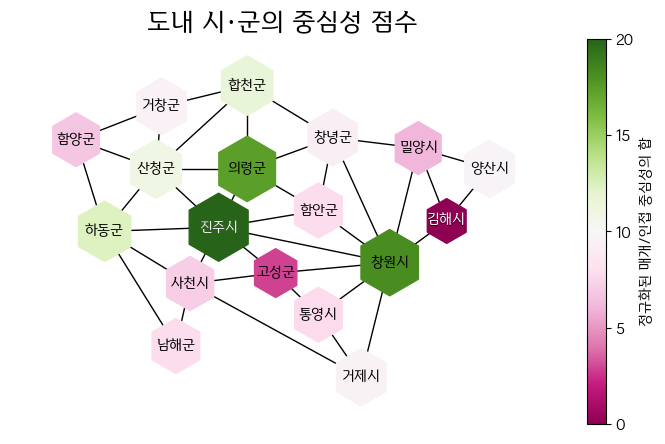

In [247]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.PiYG
G = nx.Graph()
G.add_nodes_from(ccdf['name'])
G.add_edges_from(list(T.edges()))
pos = {'합천군':(300,650),'함양군':(0,520),'산청군':(140,450),'거창군':(150,600),'창녕군':(450,525),'하동군':(50,300)
      ,'고성군':(350,200),'통영시':(425,100),'사천시':(200,175),'진주시':(250,310),'밀양시':(600,500),'창원시':(550,225)
      ,'함안군':(425,350),'양산시':(725,450),'김해시':(650,325),'거제시':(500,-50),'의령군':(300,450),'남해군':(175,25)}
nx.draw_networkx(G, with_labels=True, pos=pos, ax=ax, font_size=10, node_size=ccdf['score']*70+1000, 
                 font_family='Binggrae?', node_color=ccdf['score'], cmap=cmap, node_shape='h')
font = {"fontname": "Binggrae?", "color": "white", "fontsize": 10, "fontweight": "extra bold"}
# ax.text(
#     0.383,
#     0.53,
#     "진주시",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )
ax.text(
    0.8,
    0.52,
    "김해시",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.383,
    0.5,
    "진주시",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
norm = mpl.colors.Normalize(vmin=0, vmax=20)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='vertical', label='정규화된 매개/인접 중심성의 합', fraction=0.07, pad=0.05, location='right',ticks=[0,5,10,15,20])
plt.tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
plt.title('도내 시·군의 중심성 점수', fontsize=18)
plt.margins(0.1,0.1)
plt.show()

In [248]:
fig.savefig('도내시군중심성점수.png')

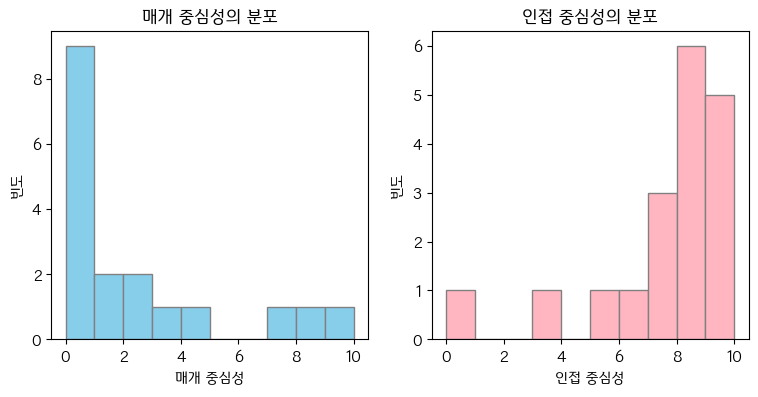

In [252]:
# distribuiton
# distribution?
fig, axs = plt.subplots(1,2, figsize=(9,4))
# fig.tight_layout()
axs[0].hist(ccdf['n.betweenness'].values, color='skyblue',edgecolor='gray')
axs[0].set(xlabel='매개 중심성',ylabel='빈도',title='매개 중심성의 분포')
axs[1].hist(ccdf['n.closeness'].values, color='lightpink', edgecolor='gray',bins=list(range(11)))
axs[1].set(xlabel='인접 중심성',ylabel='빈도',title='인접 중심성의 분포')
# axs[1].set_xticks([20, 200, 500])
plt.show()

In [253]:
fig.savefig('매개인접중심성분포.png',bbox_inches='tight')